# Data Exploration - Adventure Works 2019 Dataset 

## by Tlotliso Molapo

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering Data</a></li>   
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


- The adventure works database is a database of a fictitious multinational company called Adventure Works Cycles. The database is made by Microsoft. I will be analyzing the HR data in this database to draw insights on the employees at Adventure Works.

I will be using the following query to find my server name  in SQL

```
SELECT @@SERVERNAME
```

<a id='gathering'></a>
## Gathering data


In [2]:
#Importing liabraries
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import seaborn as sb


%matplotlib inline

In [3]:
#Printing installed drivers - pyodbc
for driver in pyodbc.drivers():
    print(driver)

SQL Server
SQL Server Native Client 11.0
ODBC Driver 17 for SQL Server
SQL Server Native Client RDA 11.0
ODBC Driver 18 for SQL Server
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)


In [4]:
#Connecting to SQL Server: Server name was removed from notebook
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=_________;'
                          'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;',autocommit=True)
cursor = conn.cursor()

In [5]:
#Query to select HR Employees lableL
query = "SELECT [BusinessEntityID],[JobTitle],[BirthDate],[MaritalStatus],[Gender],[HireDate],[VacationHours],[SickLeaveHours] FROM HumanResources.Employee;"
df_employees = pd.read_sql(query, conn)

In [6]:
#inspecting employees dataframe:
df_employees.head(20)

,BusinessEntityID,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,VacationHours,SickLeaveHours
0,1,Chief Executive Officer,1969-01-29,S,M,2009-01-14,99,69
1,2,Vice President of Engineering,1971-08-01,S,F,2008-01-31,1,20
2,3,Engineering Manager,1974-11-12,M,M,2007-11-11,2,21
3,4,Senior Tool Designer,1974-12-23,S,M,2007-12-05,48,80
4,5,Design Engineer,1952-09-27,M,F,2008-01-06,5,22
5,6,Design Engineer,1959-03-11,M,M,2008-01-24,6,23
6,7,Research and Development Manager,1987-02-24,M,M,2009-02-08,61,50
7,8,Research and Development Engineer,1986-06-05,S,F,2008-12-29,62,51
8,9,Research and Development Engineer,1979-01-21,M,F,2009-01-16,63,51
9,10,Research and Development Manager,1984-11-30,M,M,2009-05-03,16,64


In [7]:
#Query to select HR Employee Pay
query = "SELECT [BusinessEntityID], [Rate] FROM HumanResources.EmployeePayHistory;"
df_employee_pay = pd.read_sql(query, conn)

In [8]:
#Inspecting employee pay dataframe
df_employee_pay.head()

,BusinessEntityID,Rate
0,1,125.5000
1,2,63.4615
2,3,43.2692
3,4,8.6200
4,4,23.7200


In [9]:
#Query to select HR Employee Department
query = "SELECT [BusinessEntityID], [DepartmentID] FROM HumanResources.EmployeeDepartmentHistory;"
df_employee_department = pd.read_sql(query, conn)

In [10]:
#inspecting employee departments
df_employee_department.head()

,BusinessEntityID,DepartmentID
0,1,16
1,2,1
2,3,1
3,4,1
4,4,2


<a id='wrangling'></a>
## Data Wrangling

In [11]:
#### renaming departmentID to actual name and not IDS
ids = [1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16]
deps = ['Engineering', 'ToolDesign', 'Sales','Marketing','Purchasing',
        'ResearchandDevelopment','Production','ProductionControl','HumanResources',
        'Finance','InformationSystems','DocumentControl',
        'QualityAssurance','FacilitiesAndAMaintenance',
        'ShippingAndRecieving','Executive']

df_employee_department['DepartmentID'].replace( ids, deps ,inplace=True)

**In order to analyze the HR dataframes the Employee, Employee Pay and Department dataframes will be merged**

In [12]:
#merging the employees and employee pay dataframe
df_HR = pd.merge(df_employees, df_employee_pay, on = 'BusinessEntityID' )

In [13]:
#merging the department dataframe to the merged dataframe
df_HR = pd.merge(df_HR, df_employee_department, on = 'BusinessEntityID' )

In [14]:
#inspecting data types
df_HR.dtypes

BusinessEntityID      int64
JobTitle             object
BirthDate            object
MaritalStatus        object
Gender               object
HireDate             object
VacationHours         int64
SickLeaveHours        int64
Rate                float64
DepartmentID         object
dtype: object

* From the datatypes above we can see that Business entity ID which is ordinal data shows as an integer. I will convert this to a string.

In [15]:
#Changing Business Entity ID to string as ordinal data
df_HR['BusinessEntityID'] = df_HR['BusinessEntityID'].astype('str');

In [16]:
#inspecting null values
df_HR.isnull().sum()

BusinessEntityID    0
JobTitle            0
BirthDate           0
MaritalStatus       0
Gender              0
HireDate            0
VacationHours       0
SickLeaveHours      0
Rate                0
DepartmentID        0
dtype: int64

* From the data above we can see that there are no null values in the database.

In [17]:
#Showing all duplicated rows in the dataframe.
df_HR.loc[df_HR.duplicated(), :] 

,BusinessEntityID,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,VacationHours,SickLeaveHours,Rate,DepartmentID


* From the analysis above there are no duplicated rows in the dataframe.

<a id='eda'></a>
## Exploratory Data Analysis

In [18]:
#Inspecting changes and inspecting number of employees in each category
df_employee_department.DepartmentID.value_counts()

Production                   180
Sales                         18
Purchasing                    13
Finance                       11
Marketing                     10
InformationSystems            10
Engineering                    7
QualityAssurance               7
FacilitiesAndAMaintenance      7
ProductionControl              6
ShippingAndRecieving           6
HumanResources                 6
DocumentControl                5
ToolDesign                     4
ResearchandDevelopment         4
Executive                      2
Name: DepartmentID, dtype: int64

* From the data above I can see that the Production department has the most employees, with the Executive department having the least

In [19]:
#Exploring summary statistics
df_HR.describe()

,VacationHours,SickLeaveHours,Rate
count,334.000000,334.000000,334.000000
mean,48.332335,44.673653,18.187941
std,28.022948,14.810254,12.495811
min,0.000000,20.000000,6.500000
25%,26.000000,33.000000,11.000000
50%,48.000000,44.000000,14.000000
75%,71.750000,57.000000,23.076900
max,99.000000,80.000000,125.500000


**From the summary statistics above we can see that:**

* The lowest rate per hour is \$5
* The highest rate per hour is \$125.50

* The lowest available Vacation hours is 0
* The highest available Vacation hours is 71.75 hours

* The highest available Sick Leave Hours is 80 hours
* The lowest avaialble Sick leave hours is 20 hours



In [20]:
#inspecting the dataframe
df_HR.head()

,BusinessEntityID,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,VacationHours,SickLeaveHours,Rate,DepartmentID
0,1,Chief Executive Officer,1969-01-29,S,M,2009-01-14,99,69,125.5000,Executive
1,2,Vice President of Engineering,1971-08-01,S,F,2008-01-31,1,20,63.4615,Engineering
2,3,Engineering Manager,1974-11-12,M,M,2007-11-11,2,21,43.2692,Engineering
3,4,Senior Tool Designer,1974-12-23,S,M,2007-12-05,48,80,8.6200,Engineering
4,4,Senior Tool Designer,1974-12-23,S,M,2007-12-05,48,80,8.6200,ToolDesign


### Creating a SQL database from python

In [21]:
#creating database from pandas dataframe
cursor.execute(f"CREATE DATABASE {'AdventurePython'}")

### Univariate exploration

In [21]:
#Inspecting values for each gender
df_HR.Gender.value_counts()

M    237
F     97
Name: Gender, dtype: int64

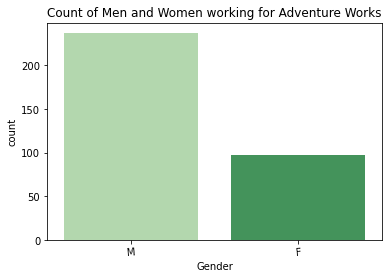

In [22]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
sb.countplot(data = df_HR, x = 'Gender', ax = ax, palette = 'Greens' )
plt.title('Count of Men and Women working for Adventure Works')
plt.xticks(rotation=5);

From the graph above I have noted that there are more men working at Adventure works than women, 237 men work at Adventure works while 97 women work at Adventure works.

**Question: Which departments are paid the highest?**

In [23]:
departments = df_HR.groupby('DepartmentID').mean().sort_values(
    by = 'Rate', ascending=False)
departments = departments.filter(['DepartmentID','Rate'])

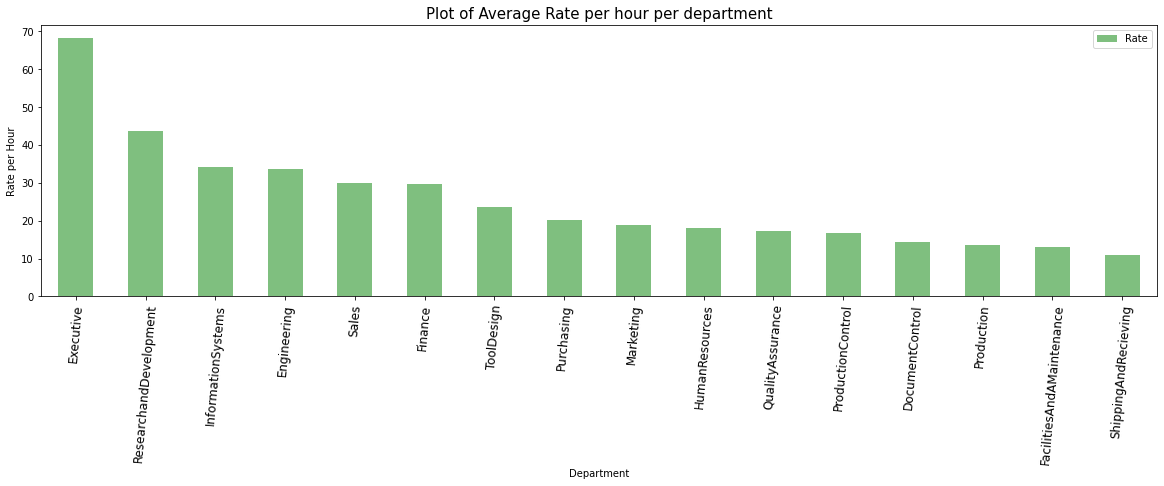

In [24]:
departments.plot(kind='bar', figsize=(20,5), color = 'green', alpha=.5)
plt.xticks(rotation=85,fontsize=12)
plt.xlabel('Department')
plt.ylabel('Rate per Hour')
plt.title('Plot of Average Rate per hour per department', fontdict={'fontsize':15});

From the graph above I noted that the departments with the highest rate per hour are Executives and Research and Development, while the 2 departments with the lowest rate per hour Facilities and Maintenance and Shipping and Recievinng  

**Question: What is the average pay per gender?**

In [25]:
genders = df_HR.groupby('Gender').mean()
genders = genders.filter(['Gender','Rate'])

In [26]:
genders.head()

,Rate
Gender,
F,20.697361
M,17.160878


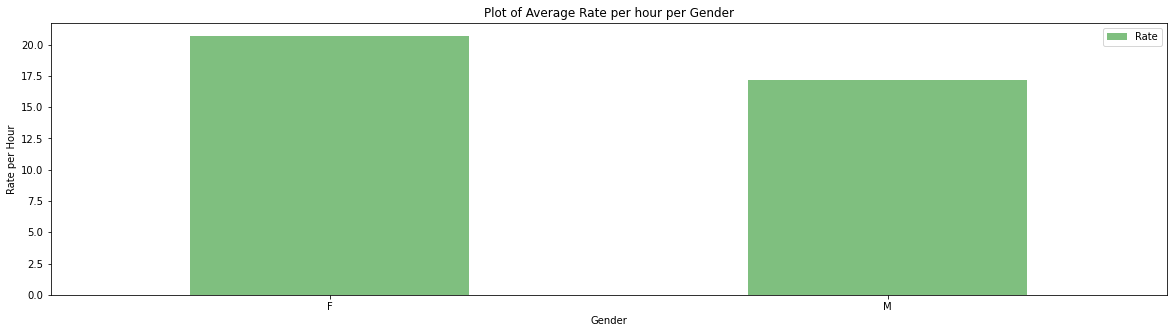

In [27]:
genders.plot(kind='bar', figsize=(20,5), color = 'green', alpha=.5)
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Rate per Hour')
plt.title('Plot of Average Rate per hour per Gender');

**The average rate per hour:** 
- for women is about \$20 per
- for men is about \$17.5 per hour.

**Question: Is there descrapency with regards to vacation hours given to each gender?**`

In [29]:
vac = df_HR.groupby('Gender').mean()
vac = vac.filter(['VacationHours'])

In [30]:
vac.head(2)

,VacationHours
Gender,
F,49.14433
M,48.00000


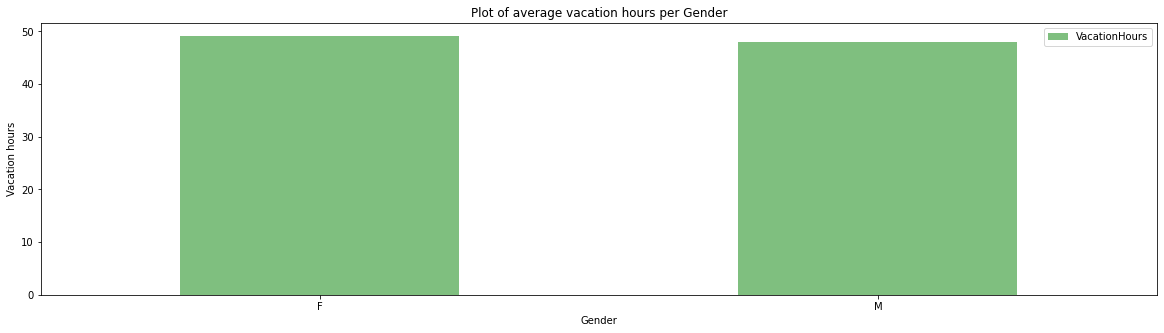

In [31]:
vac.plot(kind='bar', figsize=(20,5), color = 'green', alpha=.5)
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Vacation hours')
plt.title('Plot of average vacation hours per Gender');

* Vacation hours dont differ between male and female employees.

### Bivariate exploration

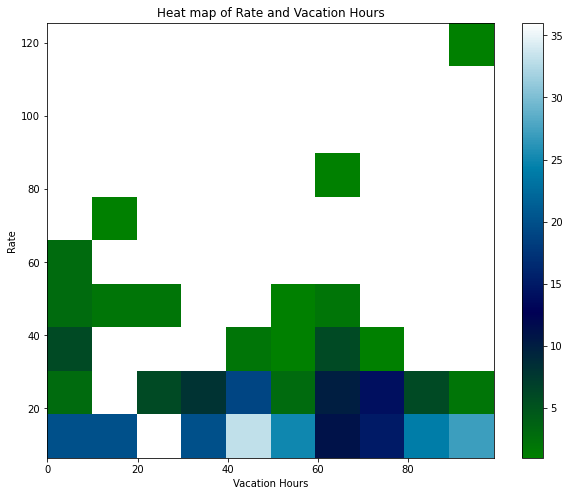

In [32]:
plt.figure(figsize=(10,8))
plt.hist2d(data = df_HR, x = 'VacationHours', y = 'Rate', cmin=0.5, cmap='ocean')
plt.colorbar()
plt.xlabel('Vacation Hours')
plt.ylabel('Rate');
plt.title('Heat map of Rate and Vacation Hours');

From the heatmap above there is no clear relationship between the vacation hours and hourly rate. Vacation hours differ from in different rate per hour ranges.

### Multivariate exploration

**What is the relationship between rate per hour and number of available Vacation Hours for men and women?**

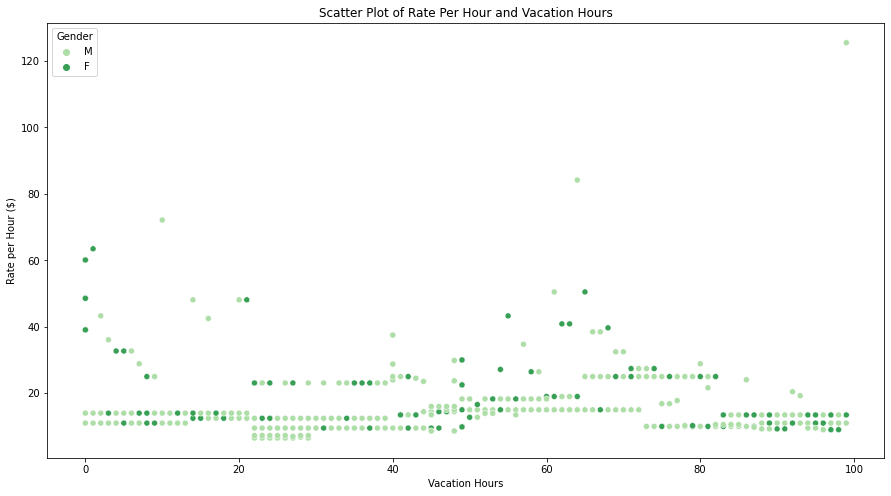

In [33]:
plt.figure(figsize=(15,8))
sb.scatterplot(x = "VacationHours", y = "Rate", data = df_HR, hue='Gender', palette='Greens')
plt.xlabel('Vacation Hours')
plt.ylabel('Rate per Hour ($)')
plt.title('Scatter Plot of Rate Per Hour and Vacation Hours');

From the scatter plot above there is no clear relationship between the vacation hours and hourly rate for men and women. Vacation hours differ from in different rate per hour ranges.

<a id='conclusions'></a>
## Conclusions

* There are more men working for Adventure works than woman.
* The production department is the department with the most employees with 180 employees.
* The highest paying departments are Executives, Research and Development and Information systems
* The lowest paying departments are Shippping and recieving, Facilities and Engineering and Production
* The avearage rate per hour for woemen is \\$20 and the average rate per hour for men is \\$17.5
* Vacation hours differ in different income ranges, with some employees in a certain range having considerably more vacation hours than other employees

In [34]:
#saving dataframe to csv in order to build streamlit dashboard.
df_HR.to_csv('main.csv')

**References**

_Connecting to SQL Database:_

https://alto-palo.com/blogs/how-to-connect-python-to-sql-server-using-pyodbc/#:~:text=Steps%20to%20Connect%20Python%20to%20SQL%20Server%20with,Step%205%3A%20Connect%20Python%20to%20SQL%20Server%20